# <font color=black> ***Problem Statement :-***

            An education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses.
    The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos. When these people fill up a form providing their email address or phone number, they are classified to be a lead. Moreover, the company also gets leads through past referrals. Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not. The typical lead conversion rate at X education is around 30%.
            There are a lot of leads generated in the initial stage (top) but only a few of them come out as paying customers from the bottom. In the middle stage, you need to nurture the potential leads well (i.e. educating the leads about the product, constantly communicating etc. ) in order to get a higher lead conversion.
    X Education has appointed you to help them select the most promising leads, i.e. the leads that are most likely to convert into paying customers. The company requires you to build a model wherein you need to assign a lead score to each of the leads such that the customers with higher lead score have a higher conversion chance and the customers with lower lead score have a lower conversion chance. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.

__Our Goals of the Case Study:__

- To **build a logistic regression model to assign a lead score** between 0 and 100 to each of the leads which can be used by the company to target potential leads. 
- To **adjust to if the company's requirement changes** in the future so you will need to handle these as well.

# Import modules

In [13]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd

import time, warnings
import datetime as dt

from IPython.display import display
pd.options.display.max_columns = None

import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib.pyplot import xticks
%matplotlib inline

import statsmodels.api as sm


In [14]:
pd.set_option('display.max_rows', 50)
pd.set_option('display.max_columns', 50)
pd.set_option('display.width', 100)

##  Step 1: Understanding and Reading the data

In [15]:
leads = pd.read_csv(r"C:\Users\panka\OneDrive\Desktop\Logistic regression\Leads.csv")

# Look at the first few entries
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [16]:
leads.shape

(9240, 37)

We have 37 columns and 9240 rows whcih is huge data we have.

In [17]:
leads.head(5)

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [18]:
#Checking data types of columns

leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

* we can see there are some null values in the data we ahve work on it for date cleaning

In [19]:
# Checking the numeric variables of the dataframes
leads.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


### Step 2: Cleaning the data for EDA

In [20]:
# Checking missing data pecentage in colunms
leads.isnull().sum()/len(leads)*100

Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   15.562771
How did you hear about X Education               23.885281
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.0000

In [21]:
# Inspecting the entries in each column

for column in leads.columns:
    print(column)
    print(leads[column].value_counts())
    print()

Prospect ID
0ed96da5-d5a4-4394-bb9c-4868863546f4    1
4a0a0e7b-2ebc-4b27-b0fe-64bca266cc98    1
ec151e94-3a48-4675-aac6-31c4100c994f    1
a570e684-cc6b-442e-880e-90ac83d156b3    1
5b6d1f99-dfb5-41b2-a02a-a7b183d09244    1
                                       ..
8c2d6237-f8bf-4fd5-a98a-951bc13d0312    1
50fa9f12-424e-4885-8e98-34ff7aa37d4d    1
6f223ce9-7e06-4b36-b662-11ef117be4e1    1
267dbbf0-4cb3-4322-8f38-6520ed556883    1
14a66e52-7cf0-42b7-b3e7-198193d921a4    1
Name: Prospect ID, Length: 9240, dtype: int64

Lead Number
655360    1
604698    1
621242    1
619195    1
600768    1
         ..
593502    1
636228    1
648518    1
580937    1
608255    1
Name: Lead Number, Length: 9240, dtype: int64

Lead Origin
Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: Lead Origin, dtype: int64

Lead Source
Google               2868
Direct Traffic       2543
Olark Chat         

Observation: 
1) There are categorical variable.  
2) There are values like 'Select' in the colums we have to convert.  
3) Missing values are high we have to drop the same columns.  

In [22]:
# Converting 'Select' values to NaN.
leads = leads.replace('Select', np.nan)
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,NaN,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,NaN,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,NaN,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,NaN,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,NaN,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,NaN,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [23]:
# Dropping all columns with null values more than 30% 

leads.drop(leads.isnull().sum()[(leads.isnull().sum()/leads.shape[0]*100)>30].index,1, inplace = True)

In [24]:
leads.shape

(9240, 27)

In [25]:
leads.isnull().sum()/len(leads)*100

Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.000000
Magazine                                          0.000000
Newspaper Article                                 0.0000

In [26]:
# Check for skewness
for column in leads.columns:
    print(column)
    print(leads[column].value_counts())
    print()

Prospect ID
0ed96da5-d5a4-4394-bb9c-4868863546f4    1
4a0a0e7b-2ebc-4b27-b0fe-64bca266cc98    1
ec151e94-3a48-4675-aac6-31c4100c994f    1
a570e684-cc6b-442e-880e-90ac83d156b3    1
5b6d1f99-dfb5-41b2-a02a-a7b183d09244    1
                                       ..
8c2d6237-f8bf-4fd5-a98a-951bc13d0312    1
50fa9f12-424e-4885-8e98-34ff7aa37d4d    1
6f223ce9-7e06-4b36-b662-11ef117be4e1    1
267dbbf0-4cb3-4322-8f38-6520ed556883    1
14a66e52-7cf0-42b7-b3e7-198193d921a4    1
Name: Prospect ID, Length: 9240, dtype: int64

Lead Number
655360    1
604698    1
621242    1
619195    1
600768    1
         ..
593502    1
636228    1
648518    1
580937    1
608255    1
Name: Lead Number, Length: 9240, dtype: int64

Lead Origin
Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: Lead Origin, dtype: int64

Lead Source
Google               2868
Direct Traffic       2543
Olark Chat         

Observation: 
* There are columns which are highly skewed and can be deleted for best result.

In [27]:
lead = leads.drop(['Prospect ID','Do Not Email','Do Not Call','Country','What is your current occupation','What matters most to you in choosing a course','Search','Magazine','Newspaper Article','X Education Forums','Newspaper','Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses','Update me on Supply Chain Content','Get updates on DM Content','I agree to pay the amount through cheque'
], axis = 1)

In [28]:
lead.head()

,Lead Number,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,A free copy of Mastering The Interview,Last Notable Activity
0,660737,API,Olark Chat,0,0.0,0,0.0,Page Visited on Website,No,Modified
1,660728,API,Organic Search,0,5.0,674,2.5,Email Opened,No,Email Opened
2,660727,Landing Page Submission,Direct Traffic,1,2.0,1532,2.0,Email Opened,Yes,Email Opened
3,660719,Landing Page Submission,Direct Traffic,0,1.0,305,1.0,Unreachable,No,Modified
4,660681,Landing Page Submission,Google,1,2.0,1428,1.0,Converted to Lead,No,Modified


Observation:

* We can see that the column 'Specialization' has nan value is very importat for data visualization.   
 will replace the null values with other variable.

In [29]:
leads.isnull().sum()/len(leads)*100

Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.000000
Magazine                                          0.000000
Newspaper Article                                 0.0000

## Step 3: Data Visualization and Analysis

### Categorical Analysis:

In [30]:
for column in leads.columns:
    print(column)
    print(leads[column].value_counts())
    print()

Prospect ID
0ed96da5-d5a4-4394-bb9c-4868863546f4    1
4a0a0e7b-2ebc-4b27-b0fe-64bca266cc98    1
ec151e94-3a48-4675-aac6-31c4100c994f    1
a570e684-cc6b-442e-880e-90ac83d156b3    1
5b6d1f99-dfb5-41b2-a02a-a7b183d09244    1
                                       ..
8c2d6237-f8bf-4fd5-a98a-951bc13d0312    1
50fa9f12-424e-4885-8e98-34ff7aa37d4d    1
6f223ce9-7e06-4b36-b662-11ef117be4e1    1
267dbbf0-4cb3-4322-8f38-6520ed556883    1
14a66e52-7cf0-42b7-b3e7-198193d921a4    1
Name: Prospect ID, Length: 9240, dtype: int64

Lead Number
655360    1
604698    1
621242    1
619195    1
600768    1
         ..
593502    1
636228    1
648518    1
580937    1
608255    1
Name: Lead Number, Length: 9240, dtype: int64

Lead Origin
Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: Lead Origin, dtype: int64

Lead Source
Google               2868
Direct Traffic       2543
Olark Chat         

In [31]:
# Replacing the categorical values by meaningful column values
lead['A free copy of Mastering The Interview'] = lead['A free copy of Mastering The Interview'].map({'Yes':1,'No':0})
lead.head()


,Lead Number,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,A free copy of Mastering The Interview,Last Notable Activity
0,660737,API,Olark Chat,0,0.0,0,0.0,Page Visited on Website,0,Modified
1,660728,API,Organic Search,0,5.0,674,2.5,Email Opened,0,Email Opened
2,660727,Landing Page Submission,Direct Traffic,1,2.0,1532,2.0,Email Opened,1,Email Opened
3,660719,Landing Page Submission,Direct Traffic,0,1.0,305,1.0,Unreachable,0,Modified
4,660681,Landing Page Submission,Google,1,2.0,1428,1.0,Converted to Lead,0,Modified


In [32]:
# Converting all values of variables having value_count less than 10 as "Others" which can be invoked for multiple variables

def Clean_Others(column):
    otherlist = leads[column].value_counts()[leads[column].value_counts() < 10].index
    leads[column].replace(otherlist,'Others',inplace=True)
    return(leads[column].value_counts())

In [33]:
lead.shape

(9240, 10)

*  After missing value and other data cleaning activities, the data now has 9240 records with 11 columns.

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

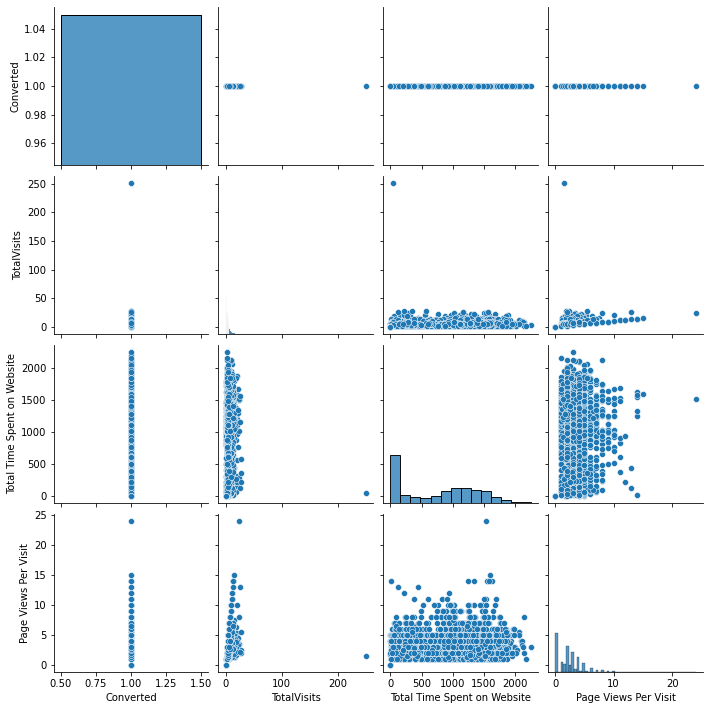

In [35]:
# Visualising the target variable "Converted"

Converted_true = lead[lead['Converted'] ==1]
varlist = ['Converted','TotalVisits','Total Time Spent on Website','Page Views Per Visit']
sns.pairplot(Converted_true, x_vars = varlist , y_vars = varlist)
plt.show()

Observations:  
1) Leads who get converted to clients typcially spend a lot more time on X Education's website.  
2) We see that leads who get converted typcially vist lot many pages of the website.
    

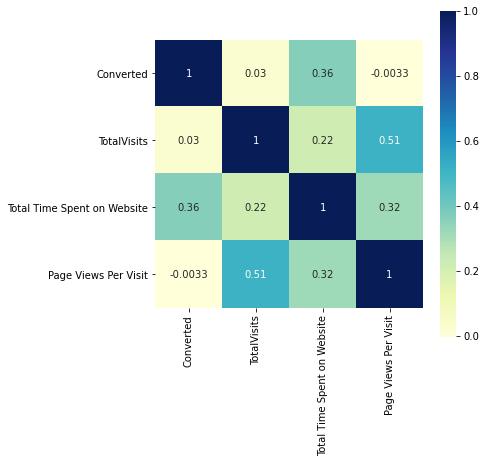

In [36]:
# Heatmap of Continuous Variables

corr = lead[varlist].corr()
f,axes = plt.subplots(1,1,figsize = (6,6))
sns.heatmap(corr,annot = True,cmap="YlGnBu",square=True)
plt.show()

* We can see that there is correlation coverted to pages views per visit


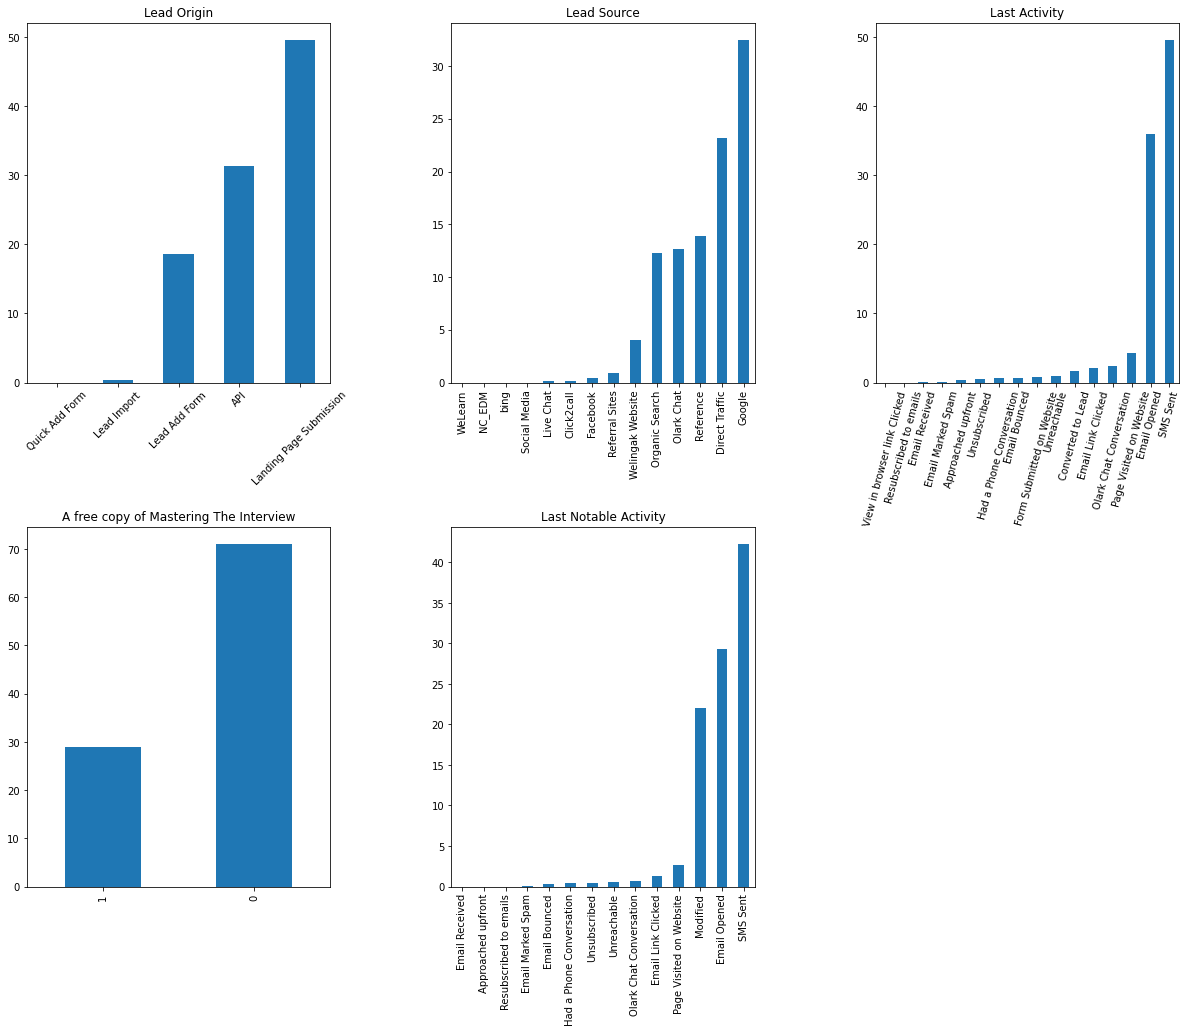

In [37]:
# Visualising Categorical Variables

plt.figure(figsize=(20, 15))
plt.subplot(2,3,1)
round(lead["Lead Origin"][lead["Converted"]==1].value_counts(normalize=True, ascending=True)*100,1).plot(kind="bar",title='Lead Origin')
plt.xticks(rotation=45)
plt.subplot(2,3,2)
round(lead["Lead Source"][lead["Converted"]==1].value_counts(normalize=True, ascending=True)*100,1).plot(kind="bar",title='Lead Source')
plt.xticks(rotation=90)
plt.subplot(2,3,3)
round(lead["Last Activity"][lead["Converted"]==1].value_counts(normalize=True, ascending=True)*100,1).plot(kind="bar",title='Last Activity')
plt.xticks(rotation=75)
plt.subplot(2,3,4)
round(lead["A free copy of Mastering The Interview"][lead["Converted"]==1].value_counts(normalize=True, ascending=True)*100,1).plot(kind="bar",title='A free copy of Mastering The Interview')
plt.xticks(rotation=90)
plt.subplot(2,3,5)
round(lead["Last Notable Activity"][lead["Converted"]==1].value_counts(normalize=True, ascending=True)*100,1).plot(kind="bar",title='Last Notable Activity')
plt.xticks(rotation=90)

plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)
plt.show()

* Observations:

1) From 1st graph we can see that more than 50% of the leads are originated from "Landing Page Submission".  
2) Lead source is from "Google" is highest as comapired to other search engine, its 30%.  
3) We can see that the the high response to the SMS for leads generated.  
4) 30% of clients are asking for "A free copy of Mastering The Interview".  
5) we can see the leads are converted for selected specialization subjects.

## Step 4: Preparing the data for modelling

In [38]:
# Dropping "Last Notable Activity" because as "Last Activity" seems to be having similar levels

lead.drop(["Last Notable Activity"],1, inplace=True)

In [39]:
lead.head()

,Lead Number,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,A free copy of Mastering The Interview
0,660737,API,Olark Chat,0,0.0,0,0.0,Page Visited on Website,0
1,660728,API,Organic Search,0,5.0,674,2.5,Email Opened,0
2,660727,Landing Page Submission,Direct Traffic,1,2.0,1532,2.0,Email Opened,1
3,660719,Landing Page Submission,Direct Traffic,0,1.0,305,1.0,Unreachable,0
4,660681,Landing Page Submission,Google,1,2.0,1428,1.0,Converted to Lead,0


#### Creating dummy variables for the categorical variables and dropping the first level

In [40]:
# Creating dummy variables for the variable 'Lead Origin'
dummy1 = pd.get_dummies(lead['Lead Origin'], prefix='Lead Origin',drop_first=True)
#Adding the results to the data
lead = pd.concat([lead,dummy1], axis=1)

In [41]:
# Creating dummy variables for the variable 'Lead Source'
dummy2 = pd.get_dummies(lead['Lead Source'], prefix='Lead Source',drop_first=True)
#Adding the results to the data
lead = pd.concat([lead,dummy2], axis=1)

In [42]:
# Creating dummy variables for the variable 'Last Activity'
dummy3 = pd.get_dummies(lead['Last Activity'], prefix='Last Activity',drop_first=True)
#Adding the results to the data
lead = pd.concat([lead,dummy3], axis=1)

In [43]:
lead.head()

,Lead Number,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow
0,660737,API,Olark Chat,0,0.0,0,0.0,Page Visited on Website,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,660728,API,Organic Search,0,5.0,674,2.5,Email Opened,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,660727,Landing Page Submission,Direct Traffic,1,2.0,1532,2.0,Email Opened,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,660719,Landing Page Submission,Direct Traffic,0,1.0,305,1.0,Unreachable,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,660681,Landing Page Submission,Google,1,2.0,1428,1.0,Converted to Lead,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [44]:
# Drop 'Lead Origin', 'Lead Source', 'Last Activity' as we have created the dummies for it
lead.drop(['Lead Origin', 'Lead Source', 'Last Activity'], axis = 1, inplace = True)

In [45]:
leads['A free copy of Mastering The Interview'] = leads['A free copy of Mastering The Interview'].map({'Yes':1,'No':0})
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,No,0,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,No,0,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Student,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,No,1,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,No,0,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,No,0,Modified


In [46]:
lead.head()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow
0,660737,0,0.0,0,0.0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,660728,0,5.0,674,2.5,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,660727,1,2.0,1532,2.0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,660719,0,1.0,305,1.0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,660681,1,2.0,1428,1.0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [47]:
lead['TotalVisits'] = lead['TotalVisits'].fillna(0)
lead['Page Views Per Visit'] = lead['Page Views Per Visit'].fillna(0)

In [48]:
lead['TotalVisits'] = lead['TotalVisits'].astype(int)
lead['Page Views Per Visit'] = lead['Page Views Per Visit'].astype(int)

## Step 5: Splitting the Data into Training and Testing Sets

Basic step for regression is performing a train-test split.

In [49]:
from sklearn.model_selection import train_test_split


In [50]:
### Dividing into X and y sets for the model building
y = lead["Converted"]
X = lead.drop(["Converted","Lead Number","Total Time Spent on Website"], 1)

In [51]:
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [52]:
X.head()

,TotalVisits,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow
0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,5,2,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,2,2,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,1,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,2,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [53]:
# We specify this so that the train and test data set always have the same rows, respectively
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [54]:
X_train.shape

(6468, 43)

In [55]:
X_test.shape

(2772, 43)

* Rescaling the Features We will be using MinMax scaling.

In [56]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [57]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_train[['TotalVisits','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits','Page Views Per Visit']])

X_train.head()

,TotalVisits,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow
1871,0.000000,0.000000,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
6795,0.015936,0.018182,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3516,0.019920,0.036364,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
8105,0.019920,0.090909,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3934,0.000000,0.000000,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [58]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

num_cols=X_train.select_dtypes(include=['float64', 'int64']).columns

X_train[num_cols] = scaler.fit_transform(X_train[num_cols])

X_train.head()

,TotalVisits,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow
1871,-0.645678,-1.029131,-0.673169,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
6795,0.109111,-0.571488,1.485511,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3516,0.297808,-0.113845,-0.673169,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
8105,0.297808,1.259085,-0.673169,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3934,-0.645678,-1.029131,-0.673169,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [59]:
### Checking the Conversion Rate percentage

converted = (sum(lead['Converted'])/len(lead['Converted'].index))*100
converted

38.53896103896104

We have almost 39% conversion rate


## Step 6: Building a model with RFE 

First, we will start with Recursive Feature Elimination

In [60]:
# Importing RFE and LogisticRegression
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
import statsmodels.api as sm
from sklearn.feature_selection import RFE

In [61]:
# Running RFE with the output number of the 15 variables

rfe = RFE(logreg,n_features_to_select=15)            
rfe = rfe.fit(X_train, y_train)

In [62]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
from sklearn.feature_selection import RFE

# running RFE with 20 variables as output

rfe = RFE(logreg, 20)            
rfe = rfe.fit(X_train, y_train)

In [63]:
rfe.support_

array([False, False, False, False,  True, False,  True, False,  True,
       False, False,  True, False, False, False, False,  True, False,
        True,  True,  True, False, False,  True, False, False, False,
        True,  True,  True,  True, False,  True,  True,  True,  True,
        True,  True,  True, False, False, False, False])

In [64]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', False, 15),
 ('Page Views Per Visit', False, 20),
 ('A free copy of Mastering The Interview', False, 22),
 ('Lead Origin_Landing Page Submission', False, 17),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 3),
 ('Lead Origin_Quick Add Form', True, 1),
 ('Lead Source_Direct Traffic', False, 10),
 ('Lead Source_Facebook', True, 1),
 ('Lead Source_Google', False, 23),
 ('Lead Source_Live Chat', False, 18),
 ('Lead Source_NC_EDM', True, 1),
 ('Lead Source_Olark Chat', False, 16),
 ('Lead Source_Organic Search', False, 14),
 ('Lead Source_Pay per Click Ads', False, 7),
 ('Lead Source_Press_Release', False, 4),
 ('Lead Source_Reference', True, 1),
 ('Lead Source_Referral Sites', False, 13),
 ('Lead Source_Social Media', True, 1),
 ('Lead Source_WeLearn', True, 1),
 ('Lead Source_Welingak Website', True, 1),
 ('Lead Source_bing', False, 21),
 ('Lead Source_blog', False, 6),
 ('Lead Source_google', True, 1),
 ('Lead Source_testone', False, 24),
 (

In [65]:
# variables shortlisted by RFE

col = X_train.columns[rfe.support_]
col

Index(['Lead Origin_Lead Add Form', 'Lead Origin_Quick Add Form', 'Lead Source_Facebook',
       'Lead Source_NC_EDM', 'Lead Source_Reference', 'Lead Source_Social Media',
       'Lead Source_WeLearn', 'Lead Source_Welingak Website', 'Lead Source_google',
       'Last Activity_Converted to Lead', 'Last Activity_Email Bounced',
       'Last Activity_Email Link Clicked', 'Last Activity_Email Marked Spam',
       'Last Activity_Email Received', 'Last Activity_Form Submitted on Website',
       'Last Activity_Had a Phone Conversation', 'Last Activity_Olark Chat Conversation',
       'Last Activity_Page Visited on Website', 'Last Activity_Resubscribed to emails',
       'Last Activity_SMS Sent'],
      dtype='object')

## Model_1

In [66]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6447
Model Family:                Binomial   Df Model:                           20
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3469.2
Date:                Tue, 12 Apr 2022   Deviance:                       6938.5
Time:                        09:39:13   Pearson chi2:                 6.71e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
const                                      -0.7515      0.044    -17.094      0.000      -0.838      -0.665
Lead Origin_Lead Add Form                   1.9530      0.480      4.065      0.000       1.011       2.895
Lead Origin_Quick Add Form                 25.2046   4.82e+04      0.001      1.000   -9.44e+04    9.45e+04
Lead Source_Facebook                       -1.0745      0.462     -2.328      0.020      -1.979      -0.170
Lead Source_NC_EDM                         23.3176   4.82e+04      0.000      1.000   -9.44e+04    9.45e+04
Lead Source_Reference                       0.9867      0.514      1.919      0.055      -0.021       1.995
Lead Source_Social Media                    1.8523      1.468      1.262      0.207      -1.026       4.730
Lead Source_WeLearn                        23.3176   4.82e+04      0.000      1.000   -9.44e+04    9.45e+04
Lead Source_Welingak Website                2.2707      0.866      2.622      0.009       0.573       3.968
Lead Source_google                        -21.7967   2.02e+04     -0.001      0.999   -3.96e+04    3.96e+04
Last Activity_Converted to Lead            -1.2981      0.187     -6.926      0.000      -1.665      -0.931
Last Activity_Email Bounced                -1.8871      0.251     -7.512      0.000      -2.379      -1.395
Last Activity_Email Link Clicked           -0.7044      0.195     -3.612      0.000      -1.087      -0.322
Last Activity_Email Marked Spam            23.3176   4.82e+04      0.000      1.000   -9.44e+04    9.45e+04
Last Activity_Email Received               23.3176   3.41e+04      0.001      0.999   -6.68e+04    6.68e+04
Last Activity_Form Submitted on Website    -0.5075      0.271     -1.874      0.061      -1.038       0.023
Last Activity_Had a Phone Conversation      2.0231      0.566      3.572      0.000       0.913       3.133
Last Activity_Olark Chat Conversation      -1.6379      0.146    -11.218      0.000      -1.924      -1.352
Last Activity_Page Visited on Website      -0.5636      0.122     -4.613      0.000      -0.803      -0.324
Last Activity_Resubscribed to emails       23.3176   4.82e+04      0.000      1.000   -9.44e+04    9.45e+04
Last Activity_SMS Sent                      1.0562      0.065     16.169      0.000       0.928       1.184
===========================================================================================================
"""

In [67]:
##Removing column Lead Origin_Quick Add Form as it has a high pvalue and hence is insignificant

col = col.drop('Lead Origin_Quick Add Form',1)

## Model_2

In [68]:
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6448
Model Family:                Binomial   Df Model:                           19
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3471.9
Date:                Tue, 12 Apr 2022   Deviance:                       6943.8
Time:                        09:39:13   Pearson chi2:                 6.71e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
const                                      -0.7514      0.044    -17.092      0.000      -0.838      -0.665
Lead Origin_Lead Add Form                   1.9415      0.478      4.059      0.000       1.004       2.879
Lead Source_Facebook                       -1.0747      0.462     -2.328      0.020      -1.979      -0.170
Lead Source_NC_EDM                         23.3174   4.82e+04      0.000      1.000   -9.44e+04    9.45e+04
Lead Source_Reference                       0.9947      0.512      1.942      0.052      -0.009       1.999
Lead Source_Social Media                    1.8522      1.468      1.261      0.207      -1.026       4.730
Lead Source_WeLearn                        23.3174   4.82e+04      0.000      1.000   -9.44e+04    9.45e+04
Lead Source_Welingak Website                2.2780      0.865      2.635      0.008       0.583       3.973
Lead Source_google                        -21.7968   2.02e+04     -0.001      0.999   -3.96e+04    3.96e+04
Last Activity_Converted to Lead            -1.2982      0.187     -6.926      0.000      -1.666      -0.931
Last Activity_Email Bounced                -1.8312      0.246     -7.448      0.000      -2.313      -1.349
Last Activity_Email Link Clicked           -0.7042      0.195     -3.612      0.000      -1.086      -0.322
Last Activity_Email Marked Spam            23.3174   4.82e+04      0.000      1.000   -9.44e+04    9.45e+04
Last Activity_Email Received               23.3174   3.41e+04      0.001      0.999   -6.68e+04    6.68e+04
Last Activity_Form Submitted on Website    -0.5075      0.271     -1.875      0.061      -1.038       0.023
Last Activity_Had a Phone Conversation      2.0231      0.566      3.572      0.000       0.913       3.133
Last Activity_Olark Chat Conversation      -1.6380      0.146    -11.219      0.000      -1.924      -1.352
Last Activity_Page Visited on Website      -0.5636      0.122     -4.614      0.000      -0.803      -0.324
Last Activity_Resubscribed to emails       23.3174   4.82e+04      0.000      1.000   -9.44e+04    9.45e+04
Last Activity_SMS Sent                      1.0562      0.065     16.169      0.000       0.928       1.184
===========================================================================================================
"""

In [69]:
##Removing column Lead Source_NC_EDM Add Form as it has a high pvalue and hence is insignificant

col = col.drop('Lead Source_NC_EDM',1)

## Model_3

In [90]:
X_train_sm = sm.add_constant(X_train[col])
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6449
Model Family:                Binomial   Df Model:                           18
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3473.0
Date:                Tue, 12 Apr 2022   Deviance:                       6946.1
Time:                        09:53:11   Pearson chi2:                 6.71e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
const                                      -0.7500      0.044    -17.069      0.000      -0.836      -0.664
Lead Origin_Lead Add Form                   1.9411      0.478      4.058      0.000       1.004       2.879
Lead Source_Facebook                       -1.0755      0.462     -2.330      0.020      -1.980      -0.171
Lead Source_Reference                       0.9944      0.512      1.941      0.052      -0.009       1.998
Lead Source_Social Media                    1.8522      1.468      1.261      0.207      -1.026       4.730
Lead Source_WeLearn                        23.3161   4.82e+04      0.000      1.000   -9.44e+04    9.45e+04
Lead Source_Welingak Website                2.2778      0.865      2.635      0.008       0.583       3.972
Lead Source_google                        -21.7971   2.02e+04     -0.001      0.999   -3.96e+04    3.96e+04
Last Activity_Converted to Lead            -1.2995      0.187     -6.933      0.000      -1.667      -0.932
Last Activity_Email Bounced                -1.8324      0.246     -7.454      0.000      -2.314      -1.351
Last Activity_Email Link Clicked           -0.7055      0.195     -3.619      0.000      -1.088      -0.323
Last Activity_Email Marked Spam            23.3161   4.82e+04      0.000      1.000   -9.44e+04    9.45e+04
Last Activity_Email Received               23.3161   3.41e+04      0.001      0.999   -6.68e+04    6.68e+04
Last Activity_Form Submitted on Website    -0.5088      0.271     -1.879      0.060      -1.039       0.022
Last Activity_Had a Phone Conversation      2.0218      0.566      3.570      0.000       0.912       3.132
Last Activity_Olark Chat Conversation      -1.6393      0.146    -11.228      0.000      -1.925      -1.353
Last Activity_Page Visited on Website      -0.5649      0.122     -4.625      0.000      -0.804      -0.326
Last Activity_Resubscribed to emails       23.3161   4.82e+04      0.000      1.000   -9.44e+04    9.45e+04
Last Activity_SMS Sent                      1.0549      0.065     16.153      0.000       0.927       1.183
===========================================================================================================
"""

In [96]:
##Removing column Lead Source_WeLearn Add Form as it has a high pvalue and hence is insignificant

col = col.drop('Lead Source_WeLearn',1)

KeyError: "['Lead Source_WeLearn'] not found in axis"

## Model_4

In [95]:
X_train_sm = sm.add_constant(X_train[col])
logm5 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6450
Model Family:                Binomial   Df Model:                           17
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3474.2
Date:                Tue, 12 Apr 2022   Deviance:                       6948.4
Time:                        09:56:34   Pearson chi2:                 6.71e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
const                                      -0.7487      0.044    -17.047      0.000      -0.835      -0.663
Lead Origin_Lead Add Form                   1.9406      0.478      4.057      0.000       1.003       2.878
Lead Source_Facebook                       -1.0763      0.462     -2.332      0.020      -1.981      -0.172
Lead Source_Reference                       0.9942      0.512      1.941      0.052      -0.010       1.998
Lead Source_Social Media                    1.8521      1.468      1.261      0.207      -1.026       4.730
Lead Source_Welingak Website                2.2776      0.865      2.634      0.008       0.583       3.972
Lead Source_google                        -21.7973   2.02e+04     -0.001      0.999   -3.96e+04    3.96e+04
Last Activity_Converted to Lead            -1.3009      0.187     -6.941      0.000      -1.668      -0.934
Last Activity_Email Bounced                -1.8336      0.246     -7.459      0.000      -2.315      -1.352
Last Activity_Email Link Clicked           -0.7067      0.195     -3.625      0.000      -1.089      -0.325
Last Activity_Email Marked Spam            23.3148   4.82e+04      0.000      1.000   -9.44e+04    9.45e+04
Last Activity_Email Received               23.3148   3.41e+04      0.001      0.999   -6.68e+04    6.68e+04
Last Activity_Form Submitted on Website    -0.5101      0.271     -1.884      0.060      -1.041       0.021
Last Activity_Had a Phone Conversation      2.0205      0.566      3.567      0.000       0.910       3.131
Last Activity_Olark Chat Conversation      -1.6406      0.146    -11.238      0.000      -1.927      -1.354
Last Activity_Page Visited on Website      -0.5662      0.122     -4.635      0.000      -0.806      -0.327
Last Activity_Resubscribed to emails       23.3148   4.82e+04      0.000      1.000   -9.44e+04    9.45e+04
Last Activity_SMS Sent                      1.0536      0.065     16.136      0.000       0.926       1.182
===========================================================================================================
"""

In [97]:
##Removing column Lead Source_google Add Form as it has a high pvalue and hence is insignificant

col = col.drop('Lead Source_google',1)

## Model_5

In [98]:
X_train_sm = sm.add_constant(X_train[col])
logm6 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm6.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6451
Model Family:                Binomial   Df Model:                           16
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3476.1
Date:                Tue, 12 Apr 2022   Deviance:                       6952.3
Time:                        10:07:09   Pearson chi2:                 6.72e+03
No. Iterations:                    20                                         
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
const                                      -0.7494      0.044    -17.063      0.000      -0.835      -0.663
Lead Origin_Lead Add Form                   1.9422      0.478      4.061      0.000       1.005       2.880
Lead Source_Facebook                       -1.0754      0.462     -2.330      0.020      -1.980      -0.171
Lead Source_Reference                       0.9936      0.512      1.940      0.052      -0.010       1.998
Lead Source_Social Media                    1.8563      1.468      1.265      0.206      -1.020       4.733
Lead Source_Welingak Website                2.2771      0.865      2.634      0.008       0.583       3.972
Last Activity_Converted to Lead            -1.3002      0.187     -6.937      0.000      -1.668      -0.933
Last Activity_Email Bounced                -1.8332      0.246     -7.457      0.000      -2.315      -1.351
Last Activity_Email Link Clicked           -0.7062      0.195     -3.622      0.000      -1.088      -0.324
Last Activity_Email Marked Spam            22.3154   2.92e+04      0.001      0.999   -5.73e+04    5.73e+04
Last Activity_Email Received               22.3154   2.07e+04      0.001      0.999   -4.05e+04    4.05e+04
Last Activity_Form Submitted on Website    -0.5095      0.271     -1.882      0.060      -1.040       0.021
Last Activity_Had a Phone Conversation      2.0211      0.566      3.569      0.000       0.911       3.131
Last Activity_Olark Chat Conversation      -1.6400      0.146    -11.233      0.000      -1.926      -1.354
Last Activity_Page Visited on Website      -0.5739      0.122     -4.702      0.000      -0.813      -0.335
Last Activity_Resubscribed to emails       22.3154   2.92e+04      0.001      0.999   -5.73e+04    5.73e+04
Last Activity_SMS Sent                      1.0529      0.065     16.129      0.000       0.925       1.181
===========================================================================================================
"""

In [99]:
##Removing column Last Activity_Email Marked Spam Add Form as it has a high pvalue and hence is insignificant

col = col.drop('Last Activity_Email Marked Spam',1)

In [ ]:
## Model_6

In [100]:
X_train_sm = sm.add_constant(X_train[col])
logm7 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm7.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6452
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3477.3
Date:                Tue, 12 Apr 2022   Deviance:                       6954.5
Time:                        10:08:29   Pearson chi2:                 6.72e+03
No. Iterations:                    20                                         
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
const                                      -0.7481      0.044    -17.041      0.000      -0.834      -0.662
Lead Origin_Lead Add Form                   1.9418      0.478      4.060      0.000       1.004       2.879
Lead Source_Facebook                       -1.0762      0.462     -2.332      0.020      -1.981      -0.172
Lead Source_Reference                       0.9934      0.512      1.939      0.052      -0.011       1.997
Lead Source_Social Media                    1.8563      1.468      1.265      0.206      -1.020       4.733
Lead Source_Welingak Website                2.2769      0.865      2.634      0.008       0.582       3.971
Last Activity_Converted to Lead            -1.3015      0.187     -6.944      0.000      -1.669      -0.934
Last Activity_Email Bounced                -1.8344      0.246     -7.462      0.000      -2.316      -1.353
Last Activity_Email Link Clicked           -0.7074      0.195     -3.629      0.000      -1.090      -0.325
Last Activity_Email Received               22.3141   2.07e+04      0.001      0.999   -4.05e+04    4.05e+04
Last Activity_Form Submitted on Website    -0.5108      0.271     -1.887      0.059      -1.041       0.020
Last Activity_Had a Phone Conversation      2.0198      0.566      3.566      0.000       0.910       3.130
Last Activity_Olark Chat Conversation      -1.6413      0.146    -11.243      0.000      -1.927      -1.355
Last Activity_Page Visited on Website      -0.5751      0.122     -4.713      0.000      -0.814      -0.336
Last Activity_Resubscribed to emails       22.3141   2.92e+04      0.001      0.999   -5.73e+04    5.73e+04
Last Activity_SMS Sent                      1.0516      0.065     16.112      0.000       0.924       1.180
===========================================================================================================
"""

In [104]:
##Removing column Last Activity_Email Received Add Form as it has a high pvalue and hence is insignificant

col = col.drop('Last Activity_Email Received',1)

## Model_7

In [105]:
X_train_sm = sm.add_constant(X_train[col])
logm8 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm8.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6453
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3479.5
Date:                Tue, 12 Apr 2022   Deviance:                       6959.1
Time:                        10:15:39   Pearson chi2:                 6.72e+03
No. Iterations:                    19                                         
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
const                                      -0.7455      0.044    -16.996      0.000      -0.831      -0.659
Lead Origin_Lead Add Form                   1.9409      0.478      4.058      0.000       1.003       2.878
Lead Source_Facebook                       -1.0779      0.461     -2.336      0.020      -1.982      -0.173
Lead Source_Reference                       0.9928      0.512      1.938      0.053      -0.011       1.997
Lead Source_Social Media                    1.8562      1.468      1.265      0.206      -1.020       4.733
Lead Source_Welingak Website                2.2764      0.865      2.633      0.008       0.582       3.971
Last Activity_Converted to Lead            -1.3041      0.187     -6.959      0.000      -1.671      -0.937
Last Activity_Email Bounced                -1.8368      0.246     -7.473      0.000      -2.319      -1.355
Last Activity_Email Link Clicked           -0.7099      0.195     -3.642      0.000      -1.092      -0.328
Last Activity_Form Submitted on Website    -0.5133      0.271     -1.896      0.058      -1.044       0.017
Last Activity_Had a Phone Conversation      2.0172      0.566      3.562      0.000       0.907       3.127
Last Activity_Olark Chat Conversation      -1.6438      0.146    -11.261      0.000      -1.930      -1.358
Last Activity_Page Visited on Website      -0.5777      0.122     -4.734      0.000      -0.817      -0.339
Last Activity_Resubscribed to emails       21.3115   1.77e+04      0.001      0.999   -3.47e+04    3.48e+04
Last Activity_SMS Sent                      1.0490      0.065     16.079      0.000       0.921       1.177
===========================================================================================================
"""

In [106]:
##Removing column Last Activity_Resubscribed to emails Add Form as it has a high pvalue and hence is insignificant

col = col.drop('Last Activity_Resubscribed to emails',1)

## Model_8

In [107]:
X_train_sm = sm.add_constant(X_train[col])
logm9 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm9.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6454
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3480.7
Date:                Tue, 12 Apr 2022   Deviance:                       6961.4
Time:                        10:17:05   Pearson chi2:                 6.72e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
const                                      -0.7442      0.044    -16.974      0.000      -0.830      -0.658
Lead Origin_Lead Add Form                   1.9404      0.478      4.057      0.000       1.003       2.878
Lead Source_Facebook                       -1.0787      0.461     -2.338      0.019      -1.983      -0.174
Lead Source_Reference                       0.9925      0.512      1.938      0.053      -0.011       1.996
Lead Source_Social Media                    1.8562      1.468      1.265      0.206      -1.020       4.733
Lead Source_Welingak Website                2.2762      0.865      2.633      0.008       0.582       3.971
Last Activity_Converted to Lead            -1.3054      0.187     -6.966      0.000      -1.673      -0.938
Last Activity_Email Bounced                -1.8380      0.246     -7.478      0.000      -2.320      -1.356
Last Activity_Email Link Clicked           -0.7112      0.195     -3.648      0.000      -1.093      -0.329
Last Activity_Form Submitted on Website    -0.5146      0.271     -1.901      0.057      -1.045       0.016
Last Activity_Had a Phone Conversation      2.0159      0.566      3.560      0.000       0.906       3.126
Last Activity_Olark Chat Conversation      -1.6451      0.146    -11.271      0.000      -1.931      -1.359
Last Activity_Page Visited on Website      -0.5790      0.122     -4.745      0.000      -0.818      -0.340
Last Activity_SMS Sent                      1.0477      0.065     16.062      0.000       0.920       1.176
===========================================================================================================
"""

## Lets check the confusion metrics and accuracy

In [70]:
from sklearn import metrics

In [71]:
# Getting the predicted values on the train set

y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

1871    0.320526
6795    0.320526
3516    0.320526
8105    0.575627
3934    0.320526
4844    0.575627
3297    0.320526
8071    0.985341
987     0.114094
7423    0.575627
dtype: float64

In [72]:
# Reshape

y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.32052618, 0.32052618, 0.32052618, 0.57562689, 0.32052618,
       0.57562689, 0.32052618, 0.98534126, 0.11409396, 0.57562689])

In [73]:
# Creating a dataframe with the actual converted flag and the predicted probabilities

y_train_pred_final = pd.DataFrame({'Converted_Actual':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final['Lead_Id'] = y_train.index
y_train_pred_final.head()

,Converted_Actual,Converted_Prob,Lead_Id
0,0,0.320526,1871
1,0,0.320526,6795
2,0,0.320526,3516
3,0,0.575627,8105
4,0,0.320526,3934


In [74]:
## Creating new column as 'predicted' with 1 if Converted_Prob more than 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted_Actual,Converted_Prob,Lead_Id,predicted
0,0,0.320526,1871,0
1,0,0.320526,6795,0
2,0,0.320526,3516,0
3,0,0.575627,8105,1
4,0,0.320526,3934,0


In [75]:
## Lets check the confusion metrics and accuracy
from sklearn import metrics

In [76]:
# Confusion matrix 

confusion = metrics.confusion_matrix(y_train_pred_final.Converted_Actual, y_train_pred_final.predicted )
print(confusion)

[[3253  749]
 [ 994 1472]]


In [77]:
## Hence we can say
# Predicted     not_converted    converted
# Actual
# not_converted        3397      461
# converted            725       1737

In [78]:
# check the overall accuracy.

print(metrics.accuracy_score(y_train_pred_final.Converted_Actual, y_train_pred_final.predicted))

0.7305194805194806


## Accuracy rate is around 73% which is not bad.

Checking VIFs 


In [79]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs

vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Lead Source_Reference,4.41
5,Lead Source_Welingak Website,3.76
9,Last Activity_Email Link Clicked,1.00
16,Last Activity_Resubscribed to emails,1.00
3,Lead Source_Social Media,1.00
4,Lead Source_WeLearn,1.00
6,Lead Source_google,1.00
8,Last Activity_Email Bounced,1.00
1,Lead Source_Facebook,1.00
10,Last Activity_Email Marked Spam,1.00


## Metrics

In [80]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [81]:
# Let's see the sensitivity of our logistic regression model

TP / float(TP+FN)

0.5969180859691808

In [82]:
# Let us calculate specificity

TN / float(TN+FP)

0.8128435782108946

In [83]:
# Calculate false postive rate - predicting non conversion when leads have converted

print(FP/ float(TN+FP))

0.18715642178910544


In [84]:

# positive predictive value 

print (TP / float(TP+FP))

0.6627645204862674


In [85]:
# Negative predictive value

print (TN / float(TN+FN))

0.7659524370143631


## Plotting the ROC Curve

In [86]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [87]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted_Actual, y_train_pred_final.Converted_Prob, 
                                         drop_intermediate = False )

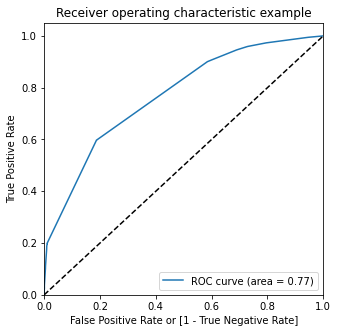

In [88]:
draw_roc(y_train_pred_final.Converted_Actual, y_train_pred_final.Converted_Prob)

## Area under ROC is 0.77 quite good

In [110]:
## probability cutoff point

In [111]:
# creating 10 points out of which one we will choose for our cutoff point

numbers=[float(x)/10 for x in range(10)]  # from 0 to 0.9 with set size 0.1

for i in numbers:
    y_train_pred_final[i]=y_train_pred_final['Converted_Prob'].map(lambda x:1 if x > i else 0)   #  Mapping the probablities for each 10 points
y_train_pred_final.head()   # Viewing the first 5 rows

,Converted_Actual,Converted_Prob,Lead_Id,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.320526,1871,0,1,1,1,1,0,0,0,0,0,0
1,0,0.320526,6795,0,1,1,1,1,0,0,0,0,0,0
2,0,0.320526,3516,0,1,1,1,1,0,0,0,0,0,0
3,0,0.575627,8105,1,1,1,1,1,1,1,0,0,0,0
4,0,0.320526,3934,0,1,1,1,1,0,0,0,0,0,0


In [113]:
# Caculating accuracy, sensitivity and specificity with probability cutoffs

# importing necessary library

from sklearn.metrics import confusion_matrix

# Creating a dataframe to store all the values to be created

df_cutoffs=pd.DataFrame(columns=['Probability','Accuracy','Sensitvity','Specificity'])

# from 0 to 0.9 with set size 0.1

var=[0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]   

for i in var:
    cm_matrix=confusion_matrix(y_train_pred_final['Converted_Actual'],y_train_pred_final[i])  # creating confusion matrix 
    total=sum(sum(cm_matrix))                                                          # Taking the sum of the matrix
    accuracy=(cm_matrix[0,0]+cm_matrix[1,1])/total                                     # Storing Accuracy Data 
    sensitivity=cm_matrix[1,1]/(cm_matrix[1,0]+cm_matrix[1,1])                         # Storing Sensitivity Data
    specificity=cm_matrix[0,0]/(cm_matrix[0,0]+cm_matrix[0,1])                         # Storing Specificity Data
    df_cutoffs.loc[i]=[i, accuracy, sensitivity, specificity]                          # Inserting all the data into the dataframe created earlier
print(df_cutoffs)   # Printing the data

     Probability  Accuracy  Sensitvity  Specificity
0.0          0.0  0.381262    1.000000     0.000000
0.1          0.1  0.497526    0.973236     0.204398
0.2          0.2  0.552566    0.946067     0.310095
0.3          0.3  0.599722    0.901054     0.414043
0.4          0.4  0.730519    0.596918     0.812844
0.5          0.5  0.730519    0.596918     0.812844
0.6          0.6  0.687075    0.196675     0.989255
0.7          0.7  0.686302    0.194242     0.989505
0.8          0.8  0.684137    0.186131     0.991004
0.9          0.9  0.658627    0.112328     0.995252


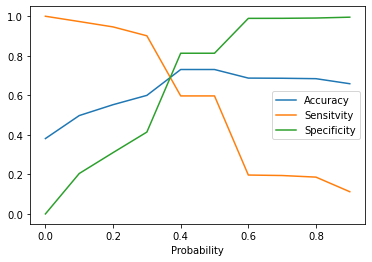

In [114]:
# Ploting 'Accuracy' , 'Sensitivity' and 'Specificity' for various probabilities(0.0 to 0.9).

df_cutoffs.plot.line(x='Probability', y=['Accuracy','Sensitvity','Specificity'])   # line plotting
plt.show()

#### From the above curve, 0.375 is the optimum point for taking probability cutoff as the meeting point is slightly before from 0.375 hence final cutoff we choose is 0.375. Also we can see that there is a trade off between sensitivity and specificity.